<a href="https://colab.research.google.com/github/vchandraiitk/datascience/blob/main/M3_NB_MiniProject_1_LinearRegression_Regularization_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [2]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [3]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [4]:
# Read the hour.csv file
# YOUR CODE HERE (T-1)
df_hour = pd.read_csv('hour.csv')

print the first five rows of dataset

In [5]:
# YOUR CODE HERE (T-2)
df_hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [6]:
# YOUR CODE HERE (T-3)
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [7]:
hourly_counts = df_hour.groupby('hr')['cnt'].sum().reset_index()
#print(hourly_counts)

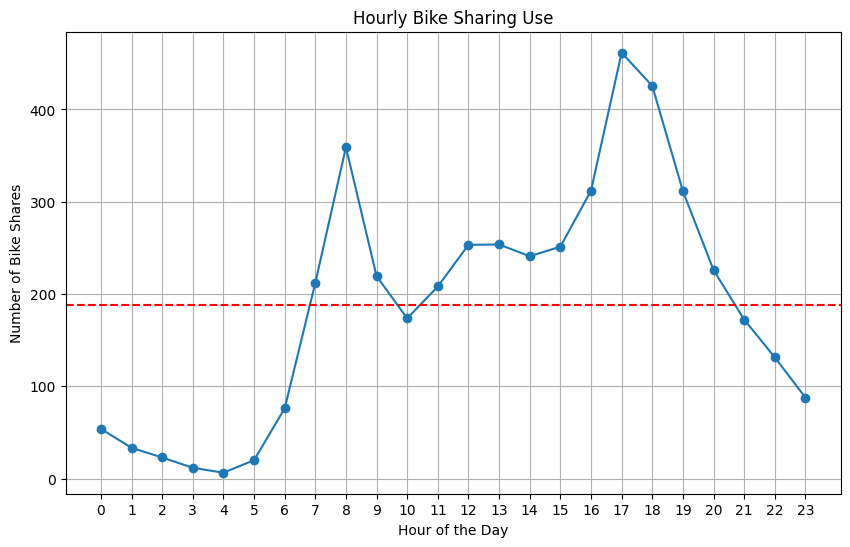

In [8]:
##with mean(replacement)(T-4)
# Group by the hour and sum the bike shares
grouped_df = df_hour.groupby('hr')['cnt'].mean().reset_index()
average_bike_shares = grouped_df['cnt'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['hr'], grouped_df['cnt'], marker='o', linestyle='-')

# Draw average line
plt.axhline(y=average_bike_shares, color='r', linestyle='--', label=f'Average: {average_bike_shares:.2f}')

# for i, row in grouped_df.iterrows():
#     plt.text(row['hr'], row['cnt'], str(row['cnt']), fontsize=9, ha='center')

plt.title('Hourly Bike Sharing Use')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

##most busiest hour is at 5pm

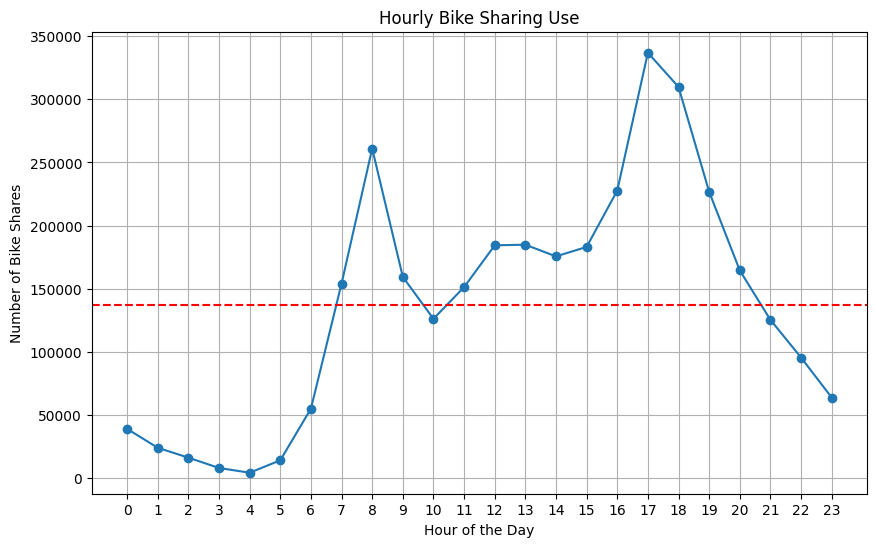

In [9]:
##with sum (replacement)(T-4)
# Group by the hour and sum the bike shares
grouped_df = df_hour.groupby('hr')['cnt'].sum().reset_index()
average_bike_shares = grouped_df['cnt'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['hr'], grouped_df['cnt'], marker='o', linestyle='-')

# Draw average line
plt.axhline(y=average_bike_shares, color='r', linestyle='--', label=f'Average: {average_bike_shares:.2f}')

# for i, row in grouped_df.iterrows():
#     plt.text(row['hr'], row['cnt'], str(row['cnt']), fontsize=9, ha='center')

plt.title('Hourly Bike Sharing Use')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

##most busiest hour is at 5pm

#### Visualize the distribution of count, casual and registered variables

<ipython-input-10-236936531a9a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hour['cnt'])


<Axes: title={'center': 'Bike Sharing Count Distribution'}, xlabel='cnt', ylabel='Frequency'>

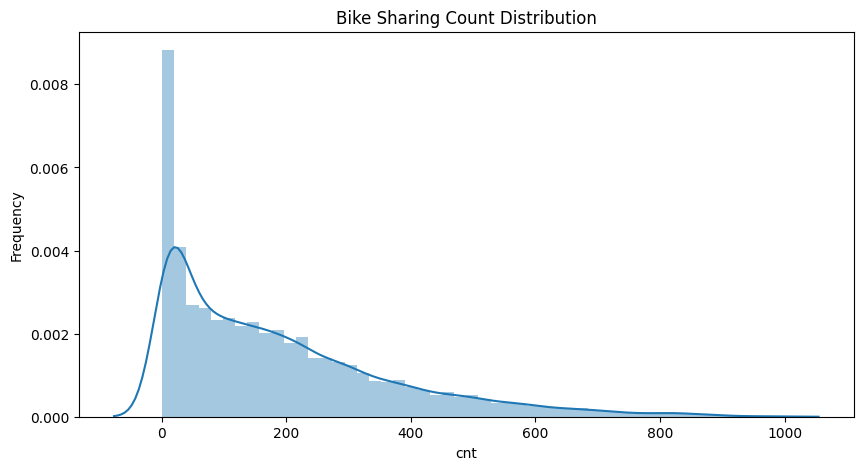

In [10]:
# YOUR CODE HERE for distribuiton of count variable (T-5)
plt.figure(figsize=(10,5))
plt.title('Bike Sharing Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
sns.distplot(df_hour['cnt'])

<ipython-input-11-33b6baf7636d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hour['casual'])


<Axes: title={'center': 'Bike Sharing Casual Distribution'}, xlabel='casual', ylabel='Frequency'>

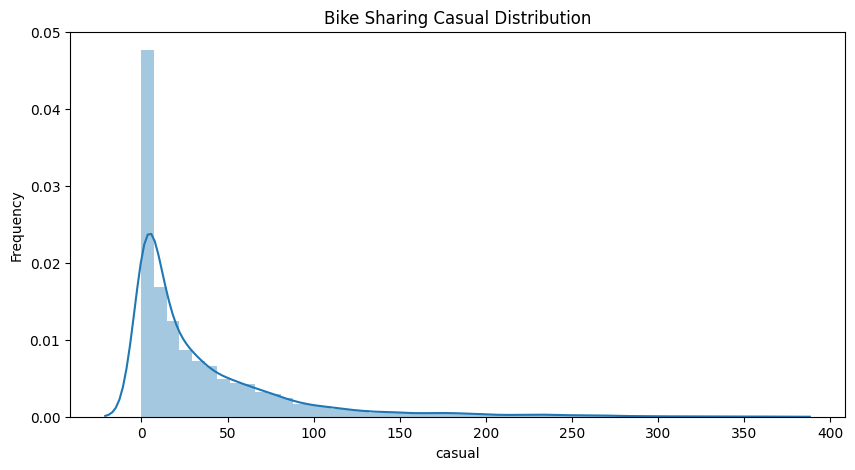

In [11]:
# YOUR CODE HERE for distribuiton of casual variable (T-6)
plt.figure(figsize=(10,5))
plt.title('Bike Sharing Casual Distribution')
plt.xlabel('Casual')
plt.ylabel('Frequency')
sns.distplot(df_hour['casual'])

<Axes: title={'center': 'Bike Sharing Registered Distribution'}, xlabel='Registered', ylabel='Frequency'>

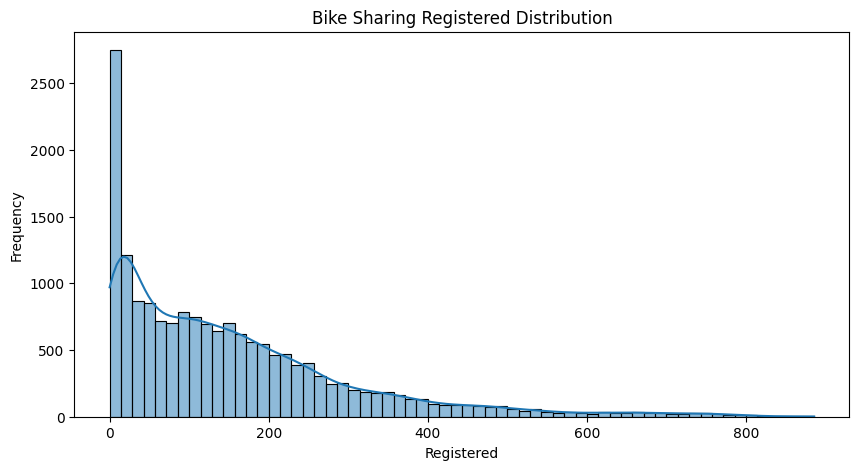

In [12]:
# YOUR CODE HERE for distribuiton of registered variable (T-7)
plt.figure(figsize=(10,5))
plt.title('Bike Sharing Registered Distribution')
plt.xlabel('Registered')
plt.ylabel('Frequency')
sns.histplot(df_hour['registered'], kde=True)

#### Describe the relation of weekday, holiday and working day

<ipython-input-13-4913ab7e4bbf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hour, x='weekday', y='cnt', palette='viridis')


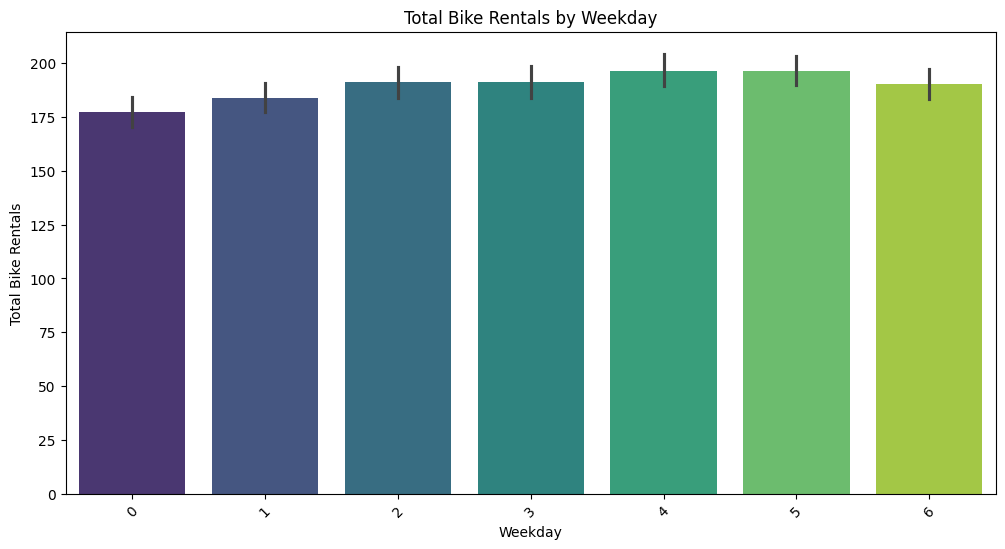

<ipython-input-13-4913ab7e4bbf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hour, x='holiday', y='cnt', palette='viridis')


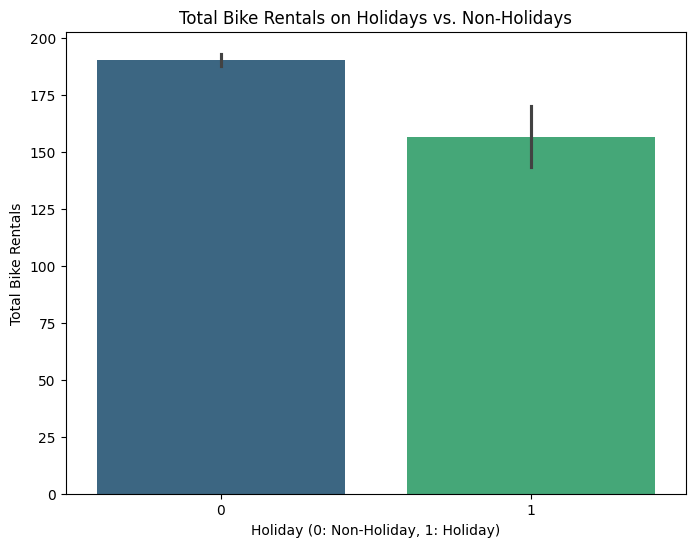

<ipython-input-13-4913ab7e4bbf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hour, x='workingday', y='cnt', palette='viridis')


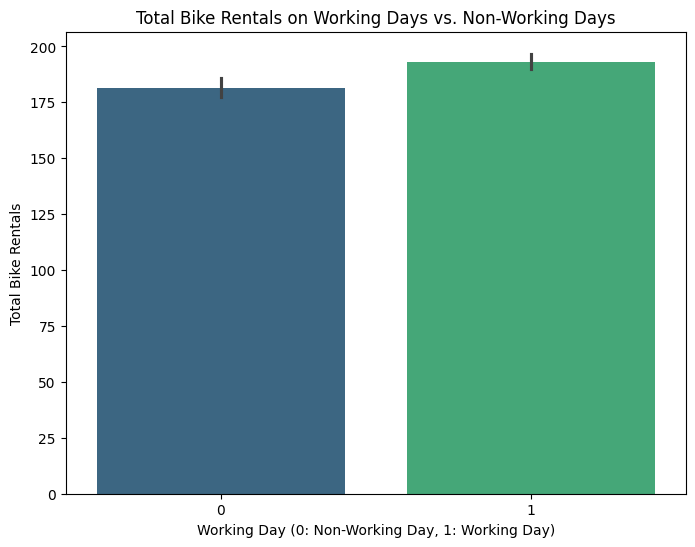

In [13]:
# YOUR CODE HERE (T-8)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_hour, x='weekday', y='cnt', palette='viridis')
plt.title('Total Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=45)
plt.show()

# Plot total bike rentals by holiday
plt.figure(figsize=(8, 6))
sns.barplot(data=df_hour, x='holiday', y='cnt', palette='viridis')
plt.title('Total Bike Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0: Non-Holiday, 1: Holiday)')
plt.ylabel('Total Bike Rentals')
plt.show()

# Plot total bike rentals by working day
plt.figure(figsize=(8, 6))
sns.barplot(data=df_hour, x='workingday', y='cnt', palette='viridis')
plt.title('Total Bike Rentals on Working Days vs. Non-Working Days')
plt.xlabel('Working Day (0: Non-Working Day, 1: Working Day)')
plt.ylabel('Total Bike Rentals')
plt.show()

From the above graph, we can say that:
1. Demand is same accross all the days
2. On a holiday demand is less
3. On Working day demand is more

In [14]:
###TO-DO Take Madhav's graph

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

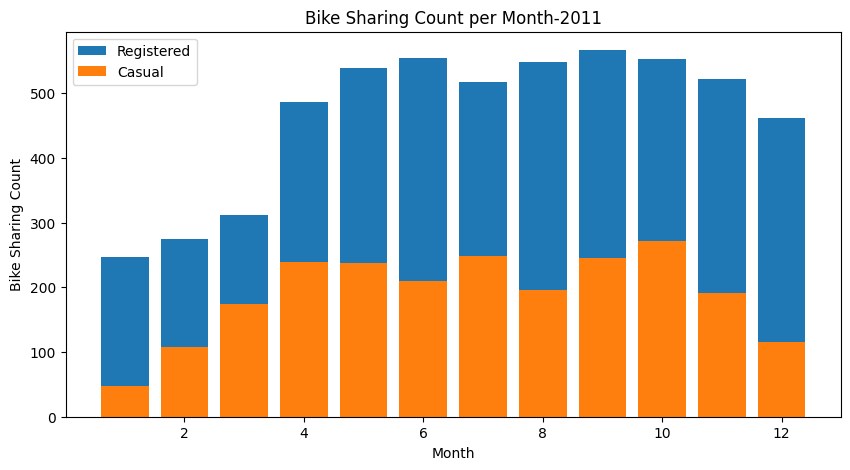

In [15]:
# stacked bar chart for year 2011
# YOUR CODE HERE (T-9)
plt.figure(figsize=(10,5))
plt.title('Bike Sharing Count per Month-2011')
plt.xlabel('Month')
plt.ylabel('Bike Sharing Count')
# sns.barplot(x='mnth', y='cnt', hue='yr', data=df_hour)
df_hour2011 = df_hour[df_hour['yr']==0]
# sns.barplot(x='mnth', y=['registered','casual'], data=df_hour2011)
plt.bar(df_hour2011['mnth'], df_hour2011['registered'], label='Registered')
plt.bar(df_hour2011['mnth'], df_hour2011['casual'], label='Casual')
plt.legend()
plt.show()

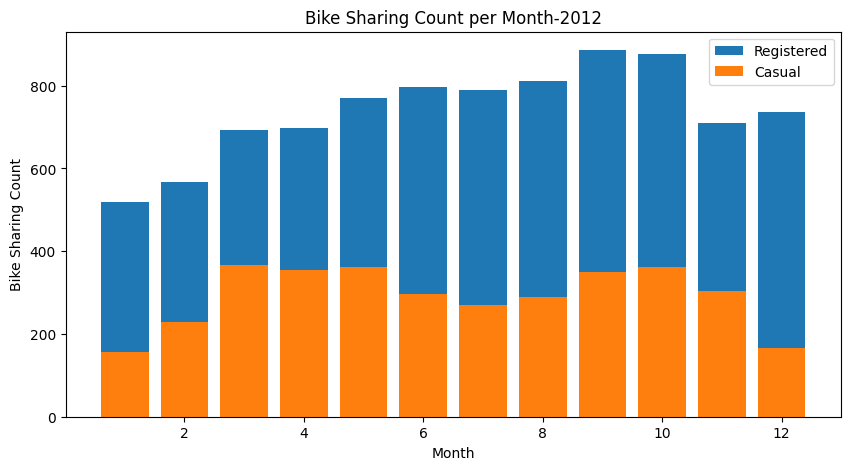

In [16]:
# stacked bar chart for year 2012
# YOUR CODE HERE (T-10)
plt.figure(figsize=(10,5))
plt.title('Bike Sharing Count per Month-2012')
plt.xlabel('Month')
plt.ylabel('Bike Sharing Count')
df_hour2012 = df_hour[df_hour['yr']==1]
plt.bar(df_hour2012['mnth'], df_hour2012['registered'], label='Registered')
plt.bar(df_hour2012['mnth'], df_hour2012['casual'], label='Casual')
plt.legend()
plt.show()

#### Analyze the correlation between features with heatmap

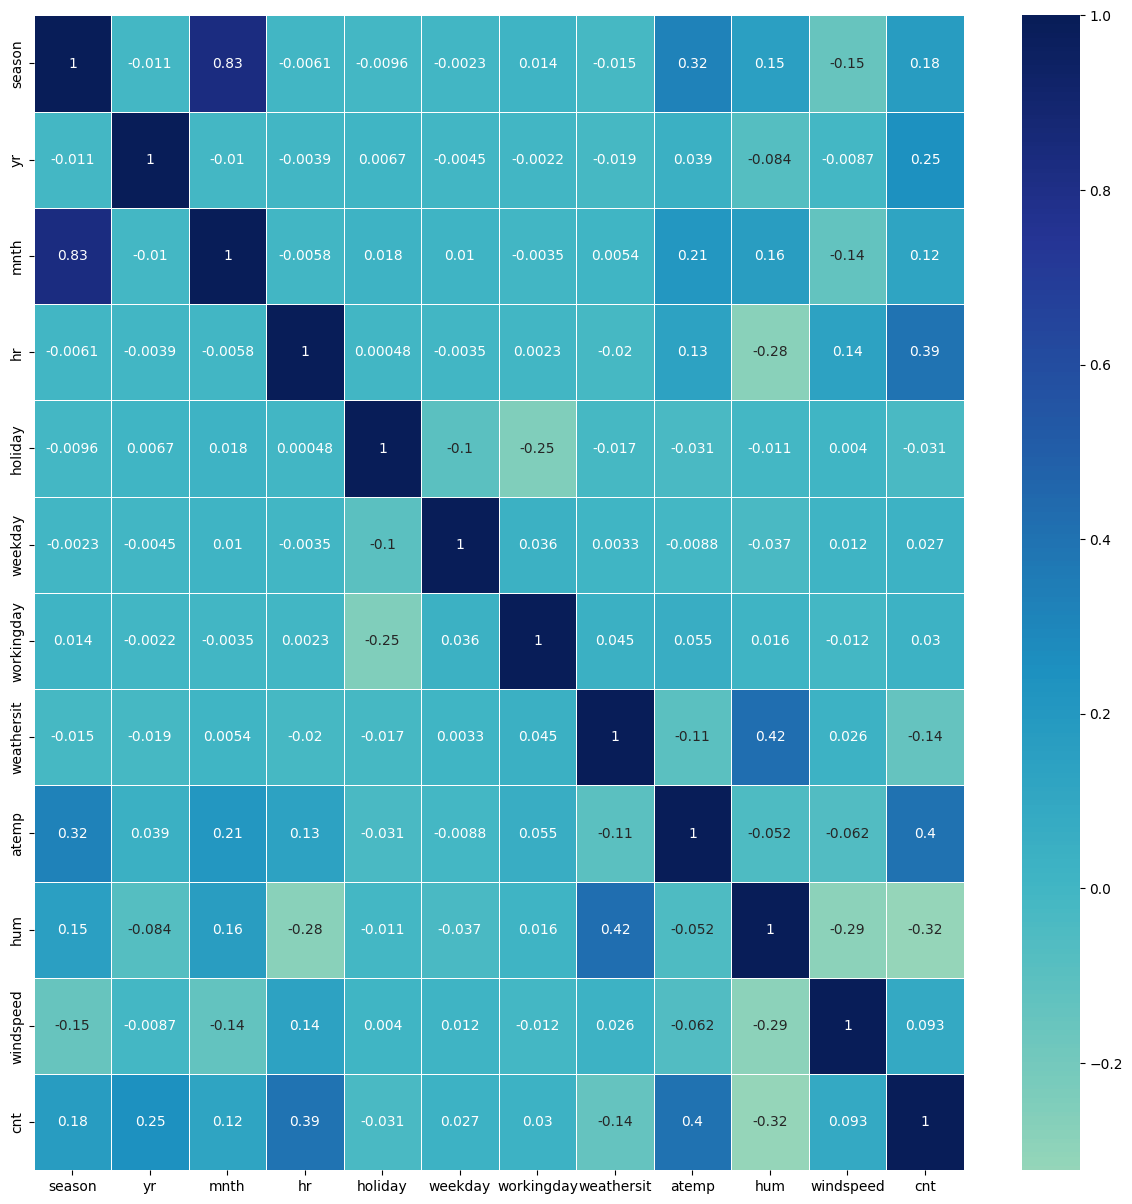

In [58]:
# YOUR CODE HERE (T-11)
df_hour = df_hour.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(15, 15))
sns.heatmap(df_hour.corr(), annot=True, linewidth=0.5, center=0, cmap='YlGnBu')
plt.show()

#### Visualize the box plot of casual and

---

registered variables to check the outliers

<Axes: title={'center': 'Box Plot of Registered'}, xlabel='Registered', ylabel='Frequency'>

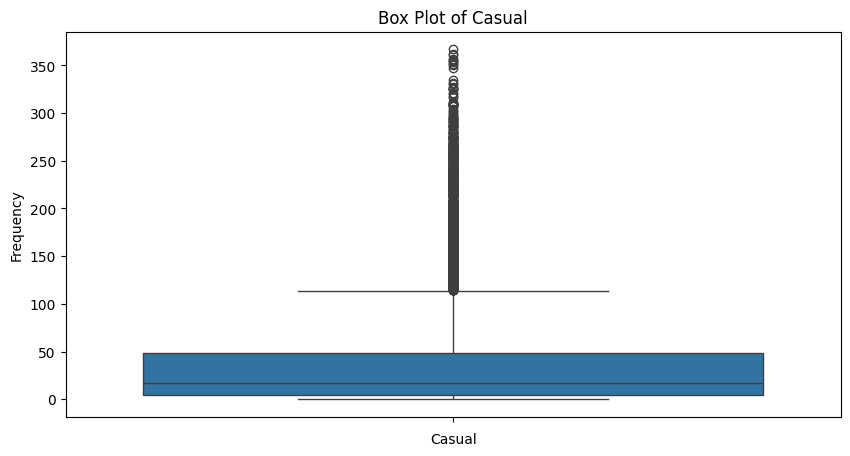

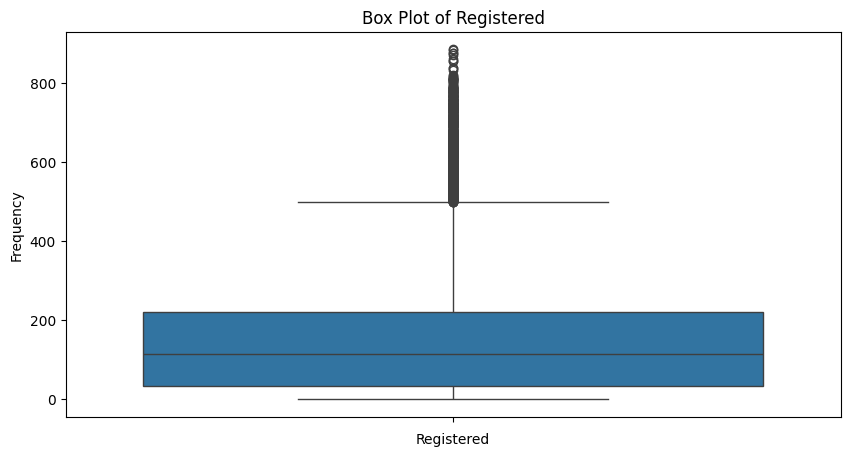

In [18]:
# YOUR CODE HERE (T-12)
plt.figure(figsize=(10,5))
plt.title('Box Plot of Casual')
plt.xlabel('Casual')
plt.ylabel('Frequency')
sns.boxplot(df_hour['casual'])
plt.figure(figsize=(10,5))
plt.title('Box Plot of Registered')
plt.xlabel('Registered')
plt.ylabel('Frequency')
sns.boxplot(df_hour['registered'])

### Pre-processing and Data Engineering (1 point)

*italicised text*#### Drop unwanted columns

In [49]:
# YOUR CODE HERE (T-13)
# Dropping the  columns as these are not required to perform linear regression.
# instant - Just a running number, not needed
# dteday - dteday is a date column, as we have day, month and year already in the dataframe we can drop this column
# casual & registered - cnt is target variable, these two columns become duplicate as casual + registered considered as cnt, hence deleting the columns
df_hour.drop(['instant', 'temp', 'dteday', 'casual', 'registered'], axis=1, inplace=True)


KeyError: "['instant', 'temp', 'dteday', 'casual', 'registered'] not found in axis"

In [50]:
df_hour

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.000000,0.015369
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.000000,0.039959
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.000000,0.031762
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.000000,0.012295
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.2576,0.60,0.193018,0.120902
17375,1,1,12,20,0,1,1,2,0.2576,0.60,0.193018,0.090164
17376,1,1,12,21,0,1,1,1,0.2576,0.60,0.193018,0.091189
17377,1,1,12,22,0,1,1,1,0.2727,0.56,0.157870,0.061475


#### Identify categorical and continuous variables


In [21]:
# YOUR CODE HERE (T-14)
#df_hour.dtypes
# for i in df_hour.columns:
#     print(f"Unique Values for Column {i} = {df_hour[i].nunique()}")

categorical=['season', 'yr','hr', 'holiday', 'workingday', 'weathersit']
continuous = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [22]:
# YOUR CODE HERE (T-15)
# Since the data has outliers, StandardScaler might not work well
scaler = MinMaxScaler()
continous_variable = ['atemp', 'hum', 'windspeed', 'cnt']
df_hour[continous_variable] = scaler.fit_transform(df_hour[continous_variable])

In [23]:
df_hour.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,0.015369
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,0.039959
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,0.031762
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,0.012295
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,0.000000


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [24]:
categorical_columns = df_hour.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
df_hour.dtypes

[]


season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
atemp         float64
hum           float64
windspeed     float64
cnt           float64
dtype: object

In [25]:
# YOUR CODE HERE (T-16)
# Since from above, the categorical_columns is None/empty column array,
# not including this to concatenate with original dataframe
encoder = OneHotEncoder(sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_hour[categorical_columns]))

#### Specify features and targets after applying scaling and one-hot encoding

In [26]:
# YOUR CODE HERE (T-17)
X = df_hour.iloc[:, :-1]
y = df_hour.iloc[:, -1]

In [27]:
print("----------------- df_hour.head(1) ----------------------------")
print(df_hour.head(1))
print("/n")
print("--------------------- X.head() ------------------------")
print(X.head())
print("/n")
print("------------------- y.head() --------------------------")
print(y.head())
print("---------------------------------------------")

----------------- df_hour.head(1) ----------------------------
   season  yr  mnth  hr  holiday  weekday  workingday  weathersit   atemp  \
0       1   0     1   0        0        6           0           1  0.2879   

    hum  windspeed       cnt  
0  0.81        0.0  0.015369  
/n
--------------------- X.head() ------------------------
   season  yr  mnth  hr  holiday  weekday  workingday  weathersit   atemp  \
0       1   0     1   0        0        6           0           1  0.2879   
1       1   0     1   1        0        6           0           1  0.2727   
2       1   0     1   2        0        6           0           1  0.2727   
3       1   0     1   3        0        6           0           1  0.2879   
4       1   0     1   4        0        6           0           1  0.2879   

    hum  windspeed  
0  0.81        0.0  
1  0.80        0.0  
2  0.80        0.0  
3  0.75        0.0  
4  0.75        0.0  
/n
------------------- y.head() --------------------------
0    0.015369

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [28]:
# YOUR CODE HERE (T-18)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
335,1,0,1,11,0,6,0,1,0.1970,0.55,0.263195
7035,4,0,10,18,0,2,1,1,0.5000,0.42,0.122840
8051,4,0,12,3,0,3,1,3,0.4545,1.00,0.263195
2133,2,0,4,18,0,0,0,2,0.4545,0.31,0.000000
8485,1,0,12,6,0,0,0,1,0.2273,0.75,0.122840


#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [48]:
# YOUR CODE HERE (T-19)
theta = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
print("Theta is the vector of coefficients  {}\n".format(theta))

Theta is the vector of coefficients  [ 2.03275161e-02  8.31183038e-02  1.19695669e-04  7.62098045e-03
 -2.75687156e-02  1.31680168e-03  2.04217680e-03 -3.92928596e-03
  3.12574421e-01 -2.21911390e-01  2.09761164e-02]



In [47]:
# # YOUR CODE HERE (T-19)
# def normal_equation(X, y):
#     theta = np.linalg.lstsq(X, y, rcond=None)[0]
#     return theta

# theta = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
# #theta = normal_equation(X_train, y_train)
# print("Theta is {}\n".format(theta))

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [32]:
# YOUR CODE HERE (T-20)


#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [33]:
# YOUR CODE HERE (T-21)

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [57]:
# YOUR CODE HERE (T-22)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([0.45493307, 0.20735482, 0.05691443, ..., 0.043786  , 0.19511309,
       0.21977524])

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [54]:
# YOUR CODE HERE (T-23)
coeff_of_determination = r2_score(y_test, y_pred)
round(coeff_of_determination, 4)

0.3883

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

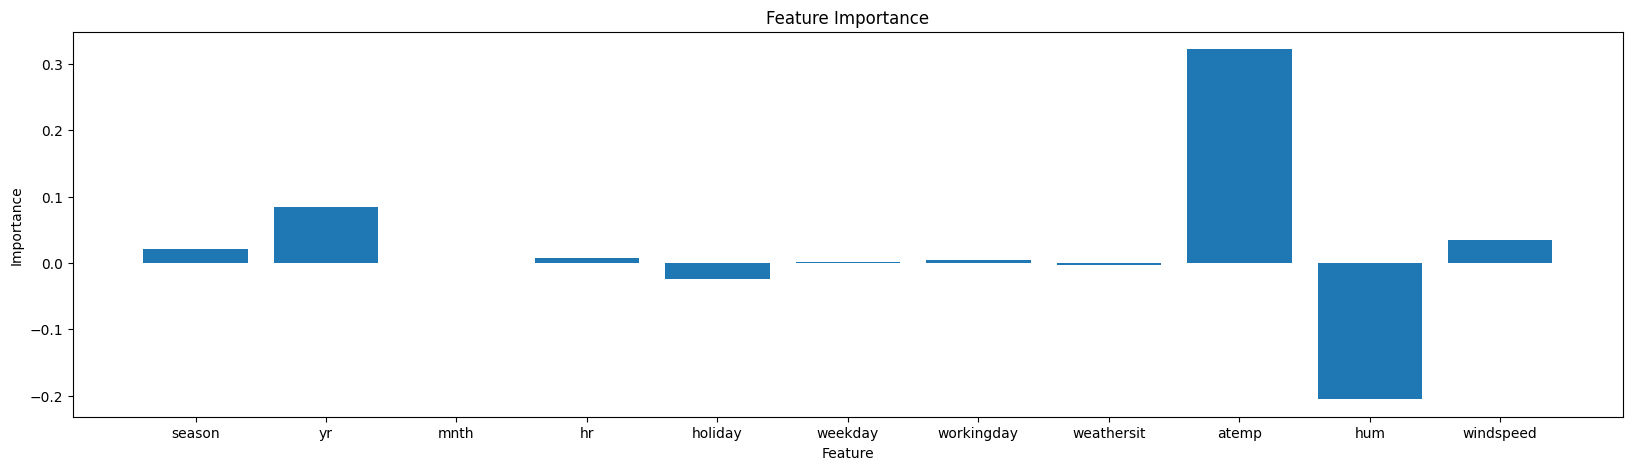

In [37]:
# YOUR CODE HERE (T-24)
plt.figure(figsize=(20,5))
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.bar(X.columns, lr.coef_)
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [38]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [39]:
# YOUR CODE HERE (T-25)
lasso_errors = []
for test_alpha in alpha:
    lasso_reg = Lasso(alpha=test_alpha)
    lasso_reg.fit(X_train, y_train)
    y_pred_lasso = lasso_reg.predict(X_test)
    lasso_errors.append(mean_squared_error(y_test,y_pred))
    print("Alpha: {}, MSE: {}".format(test_alpha, mean_squared_error(y_test, y_pred_lasso)))

print("Best alpha: {}".format(alpha[np.argmin(lasso_errors)]))

Alpha: 0.0001, MSE: 0.02033981720103074
Alpha: 0.001, MSE: 0.020476186504344546
Alpha: 0.01, MSE: 0.025141837590592107
Alpha: 0.1, MSE: 0.028083192340511657
Alpha: 1, MSE: 0.03327443864572482
Alpha: 10, MSE: 0.03327443864572482
Alpha: 100, MSE: 0.03327443864572482
Best alpha: 0.0001


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [40]:
# YOUR CODE HERE (T-26)
ridge_errors = []
for test_alpha in alpha:
    ridge_reg = Ridge(alpha=test_alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    ridge_errors.append(mean_squared_error(y_test,y_pred_ridge))
    print("Alpha: {}, MSE: {}".format(test_alpha, mean_squared_error(y_test, y_pred_ridge)))

print("Best alpha: {}".format(alpha[np.argmin(ridge_errors)]))

Alpha: 0.0001, MSE: 0.0203341264779069
Alpha: 0.001, MSE: 0.020334127327713798
Alpha: 0.01, MSE: 0.020334135827960478
Alpha: 0.1, MSE: 0.02033422104806697
Alpha: 1, MSE: 0.020335094886760535
Alpha: 10, MSE: 0.020345875940516345
Alpha: 100, MSE: 0.020574471814784275
Best alpha: 0.0001


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [41]:
# YOUR CODE HERE (T-27)
elastic_errors = []
for test_alpha in alpha:
    elastic_reg = ElasticNet(alpha=test_alpha)
    elastic_reg.fit(X_train,y_train)
    y_pred_elastic = elastic_reg.predict(X_test)
    elastic_errors.append(mean_squared_error(y_test,y_pred_elastic))
    print("Alpha: {}, MSE: {}".format(test_alpha, mean_squared_error(y_test, y_pred_elastic)))

print("Best alpha: {}".format(alpha[np.argmin(elastic_errors)]))

Alpha: 0.0001, MSE: 0.02033747054094677
Alpha: 0.001, MSE: 0.020404134559126437
Alpha: 0.01, MSE: 0.02240649350251474
Alpha: 0.1, MSE: 0.027676471028636608
Alpha: 1, MSE: 0.033155686881121214
Alpha: 10, MSE: 0.03327443864572482
Alpha: 100, MSE: 0.03327443864572482
Best alpha: 0.0001


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
